In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!gdown 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749' -O Aerofit.csv

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df.head(10)

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47
5   KP281   20  Female         14     Partnered      3        3   32973     66
6   KP281   21  Female         14     Partnered      3        3   35247     75
7   KP281   21    Male         13        Single      3        3   32973     85
8   KP281   21    Male         15        Single      5        4   35247    141
9   KP281   21  Female         15     Partnered      2        3   37521     85

In [3]:
len(df)

180

In [4]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Since there are no null values found we can start with the Exploratory data analysis.

In [7]:
def nuniqe(df):
  for i in df.columns:
    print(i,':',df[i].nunique())

In [8]:
nuniqe(df)

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


## Detection and removal of Outliers

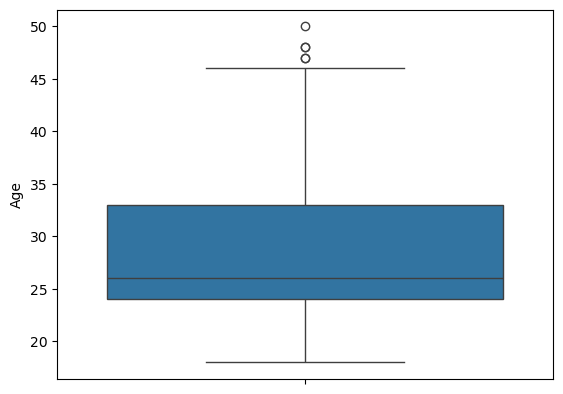

In [9]:
Outlier_Age = sns.boxplot(df['Age'])

<Axes: ylabel='Age'>

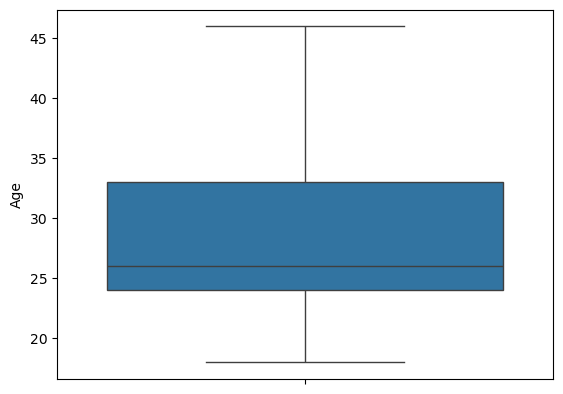

In [10]:
# Detecting Outliers by calculating the Inter Quartile Range of age column.
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

upper_array = np.where(df['Age'] >= Upper)[0]
lower_array = np.where(df['Age'] <= Lower)[0]

#Dropping the Outliers
df.drop(index = upper_array , inplace = True)
df.drop(index = lower_array , inplace = True)

sns.boxplot(df['Age'])

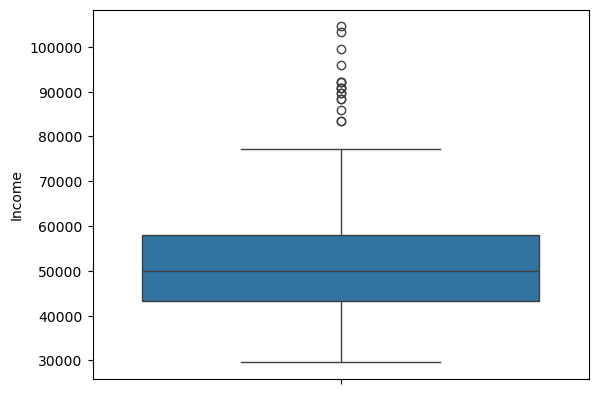

In [11]:
outliers_income = sns.boxplot(df['Income'])

<Axes: ylabel='Income'>

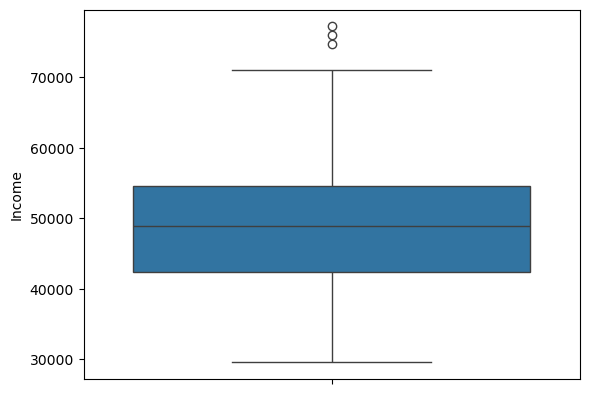

In [12]:
# Detecting Outliers by calculating the Inter Quartile Range of Income column.
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

upper_array = df[df['Income'] >= Upper].index
lower_array = df[df['Income'] <= Lower].index

#Dropping the Outliers
df.drop(index = upper_array , inplace = True)
df.drop(index = lower_array , inplace = True)

sns.boxplot(df['Income'])


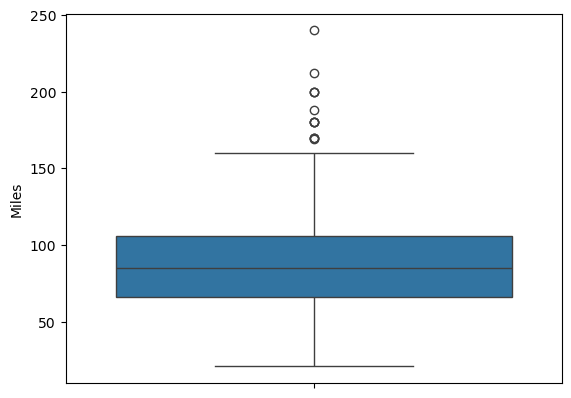

In [13]:
outliers_income = sns.boxplot(df['Miles'])

<Axes: ylabel='Miles'>

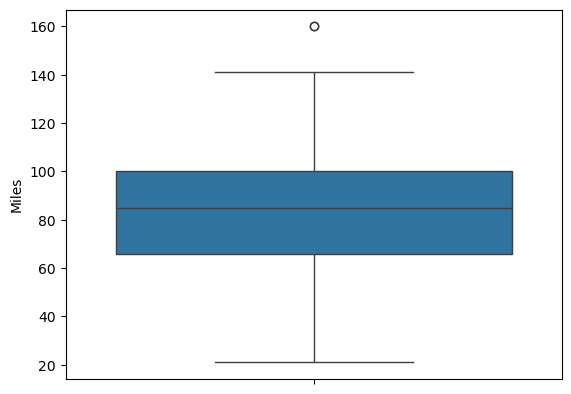

In [14]:
# Detecting Outliers by calculating the Inter Quartile Range of Miles column.
Q1 = df['Miles'].quantile(0.25)
Q3 = df['Miles'].quantile(0.75)
IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

upper_array = df[df['Miles'] >= Upper].index
lower_array = df[df['Miles'] <= Lower].index

##Dropping the Outliers
df.drop(index = upper_array , inplace = True)
df.drop(index = lower_array , inplace = True)

sns.boxplot(df['Miles'])


# Distribution of Products in the data set.

<function matplotlib.pyplot.show(close=None, block=None)>

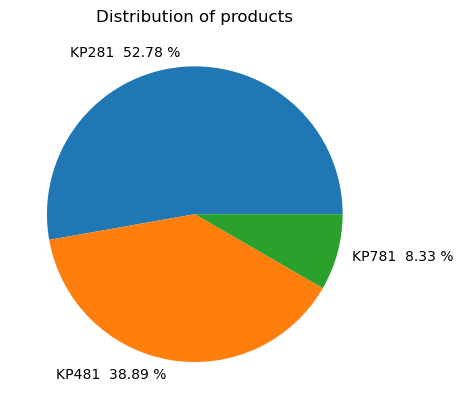

In [15]:

KP281 = df[df['Product']=='KP281'].size

KP481 = df[df['Product']=='KP481'].size

KP781 = df[df['Product']=='KP781'].size


arr = [KP281,KP481,KP781]
l1 = 'KP281  ' + str(round((KP281/df.size),4)*100) + ' %'
l2 = 'KP481  ' + str(round((KP481/df.size),4)*100) + ' %'
l3 = 'KP781  ' + str(round((KP781/df.size),4)*100) + ' %'
mylabel = [l1,l2,l3]

plt.pie(arr,labels = mylabel)
plt.title('Distribution of products')
plt.show

## The overall distribution of product KP281 is most sold with sales of 52.78 % and then KP481 with 38.89 % and KP781 is the least sold product with a sales of 8.33%

# Distribution of gender and maritial status

Text(0.5, 1.0, 'Distribution of gender')

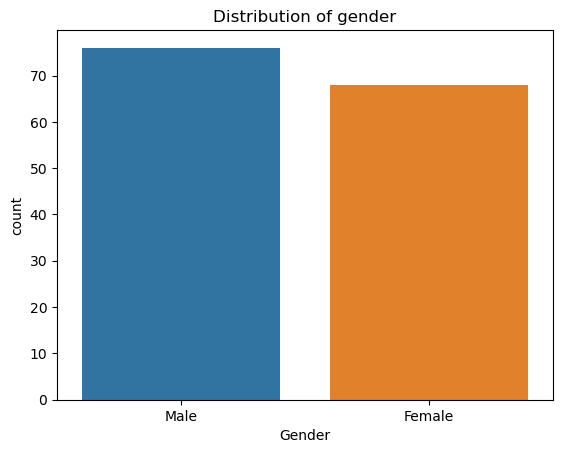

In [16]:
sns.countplot(x = 'Gender',data = df,hue = 'Gender')
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of martial status')

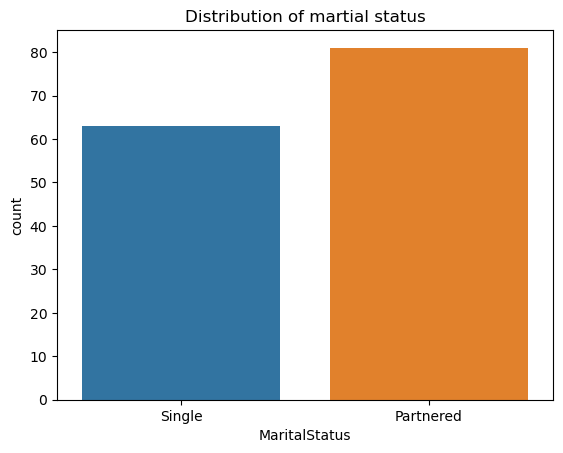

In [17]:
sns.countplot(x = 'MaritalStatus',data = df,hue = 'MaritalStatus')
plt.title('Distribution of martial status')

<Axes: xlabel='Product', ylabel='MaritalStatus-Gender'>

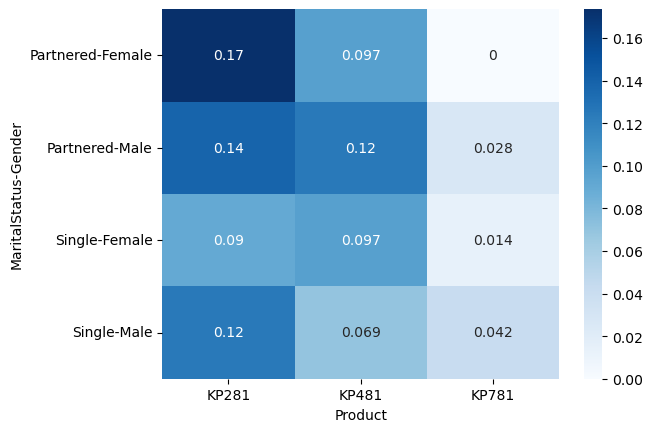

In [18]:
ctab = pd.crosstab([df.MaritalStatus,df.Gender],df.Product,normalize = True).round(4)

sns.heatmap(ctab, cmap = 'Blues',annot=True)
#sns.countplot(data = df , x = 'Gender' , hue = 'MaritalStatus', stacked = True)

<Axes: xlabel='Product', ylabel='Gender'>

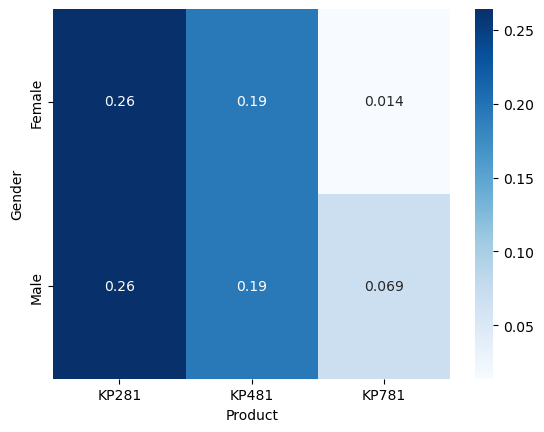

In [19]:
ctab = pd.crosstab(df.Gender,df.Product,normalize = True).round(4)

sns.heatmap(ctab, cmap = 'Blues',annot=True)

Observations from analysing the data reveals that there are more Male Customers then female customers overall and for both gender types there are more married customers then their unmarried counterparts Except for product KP781 for which Single customers are more then their married counterparts.

For Product KP281 there are more married Female then married male and for rest products(KP481,KP781) there are more married male customers then un married counterparts.

For Product KP281 and KP781 there are more unmarried Male then unmarried female

For Product KP481 there are more unmarried female then unmarried male

<Axes: xlabel='Usage', ylabel='Density'>

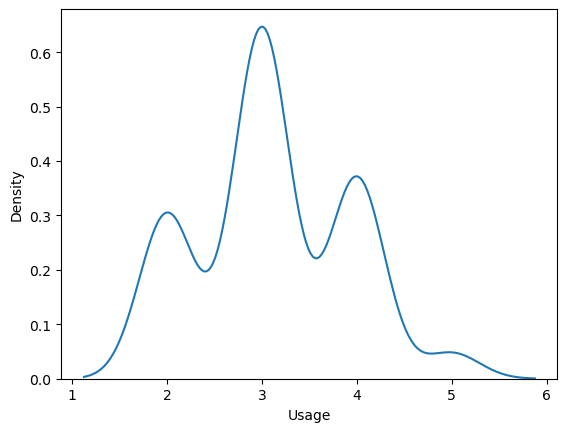

In [20]:
sns.kdeplot(data = df , x = 'Usage')

# Relation ship between Fitness and Usage

<Axes: xlabel='Usage', ylabel='Fitness'>

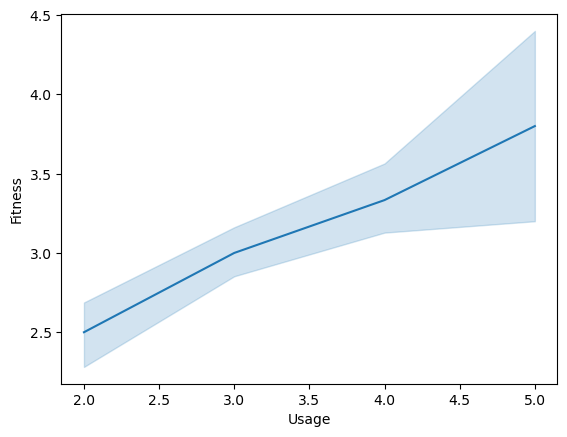

In [21]:
sns.lineplot(data = df , x  = 'Usage', y = 'Fitness')

<Axes: xlabel='Usage', ylabel='count'>

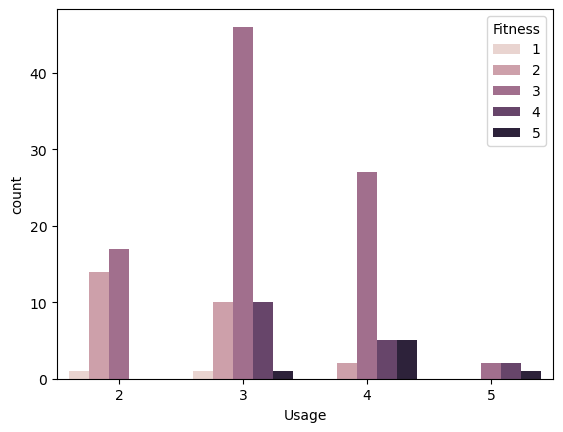

In [22]:
sns.countplot(data = df , x = 'Usage', hue='Fitness')

From the above observation we can see that Usage is directly proposnal to the Fitness, Hence people who use more have higher level of fitness

<Axes: xlabel='Fitness', ylabel='Miles'>

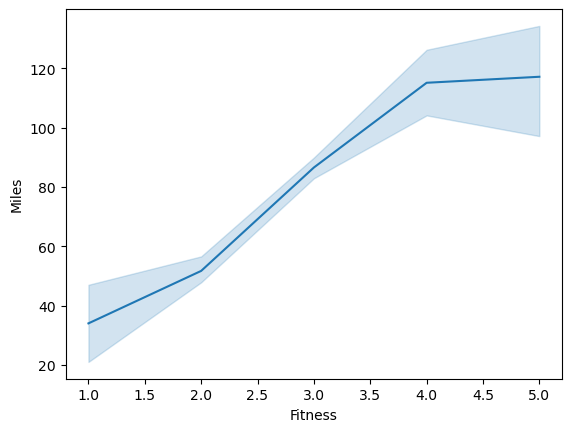

In [23]:
sns.lineplot(data = df , x  = 'Fitness', y = 'Miles')

<Axes: xlabel='Product', ylabel='Miles'>

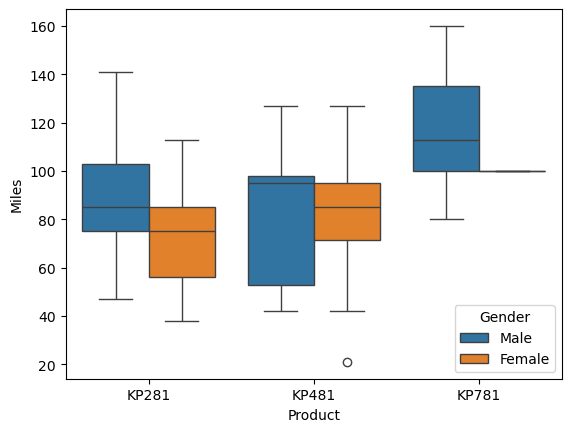

In [24]:
sns.boxplot(data = df , x = 'Product' , y = 'Miles' , hue = 'Gender')

<Axes: xlabel='Product'>

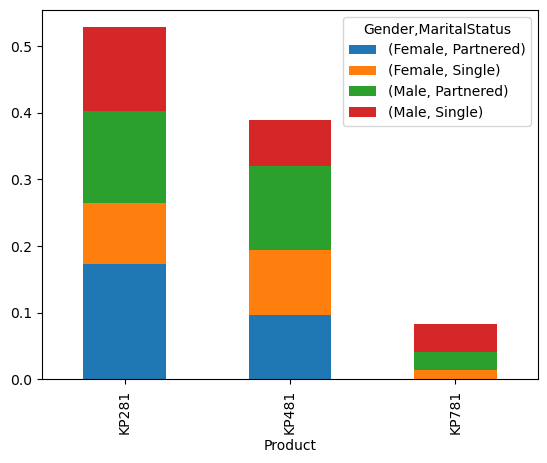

In [25]:
ctab = pd.crosstab(df.Product,[df.Gender,df.MaritalStatus],values=df.Usage,aggfunc='count',normalize = True).round(4)
ctab.plot(kind = 'bar',stacked=True)

In [26]:
ctab

Gender           Female              Male        
MaritalStatus Partnered  Single Partnered  Single
Product                                          
KP281            0.1736  0.0903    0.1389  0.1250
KP481            0.0972  0.0972    0.1250  0.0694
KP781            0.0000  0.0139    0.0278  0.0417

From the observation we can see that Fitness is directly proposnal to the Usage.
Hence people with more usage are generally more fit.

We also observed that people with high fitness has more miles as well.

When we compared product,miles and Gender we found out that generally more miles are covered on KP781 
And on an average in all products males have more miles then females.

But since no of people used KP781 is the least and it has the most miles, it may suggest that athelets use this product 
more for training, then normal people do for daily fitness. 

When we analysed the Usage with Product,gender and maritalstatus, it shows that KP281 is the most used product 
followed by KP481 and KP781.

we can also see from the above chart that for product KP481 and KP281 is used mostly by
Married Males and Married Females, whereas for product KP781 there are more Unmarried and Married male users
then their female counterparts.

We can conclude from the above analysis that people with more fitness generally use the product more
and these kind of people prefer product KP781.

<Axes: xlabel='Product', ylabel='Income'>

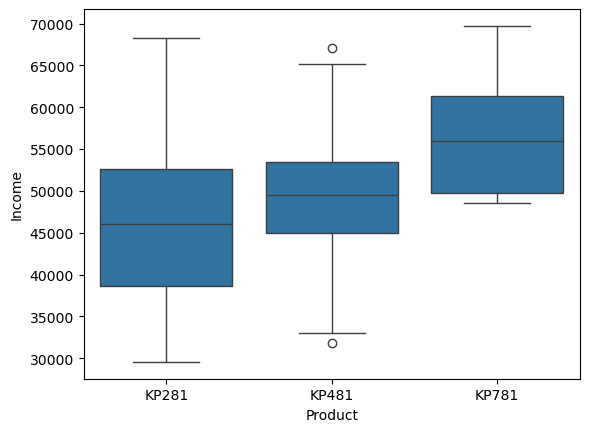

In [27]:
sns.boxplot(data = df , x= 'Product' , y = 'Income')

<Axes: xlabel='Product', ylabel='Income'>

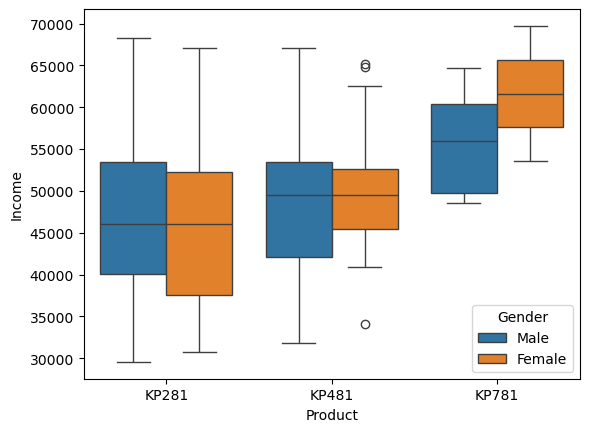

In [28]:
sns.boxplot(data = df , x= 'Product' , y = 'Income' , hue = 'Gender')

From the above observation we can see that people with higher incomes mostly prefer product KP781 
and people with average income prefer KP481 or KP281, but people with low income compared to others 
prefer KP281.
Which also tells us that KP281 is most Budget friendly.

Text(0.5, 0, 'Age')

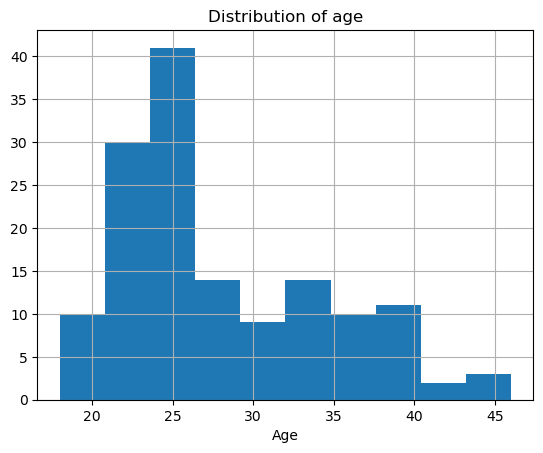

In [29]:
df.hist('Age')
plt.title('Distribution of age')
plt.xlabel('Age')


The above distribution shows that customers aging between range of 20 and 30 tend to buy the product more.

<Axes: xlabel='Product', ylabel='Age'>

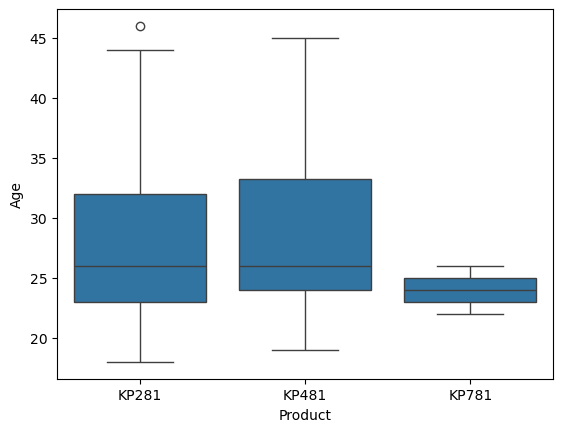

In [30]:
sns.boxplot(data = df , x = 'Product' , y = 'Age')

<Axes: xlabel='Age', ylabel='Fitness'>

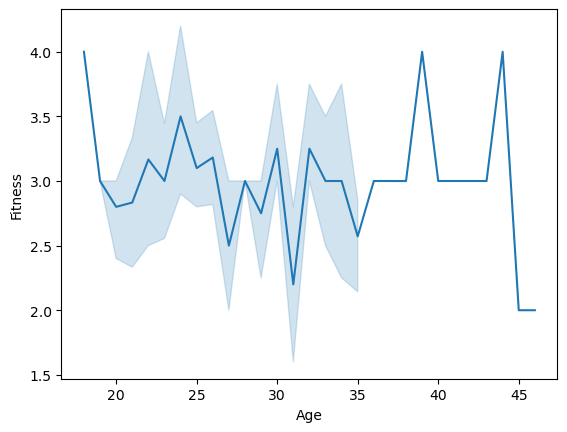

In [31]:
sns.lineplot(data = df , x = 'Age',y = 'Fitness')

<Axes: xlabel='Product', ylabel='Age'>

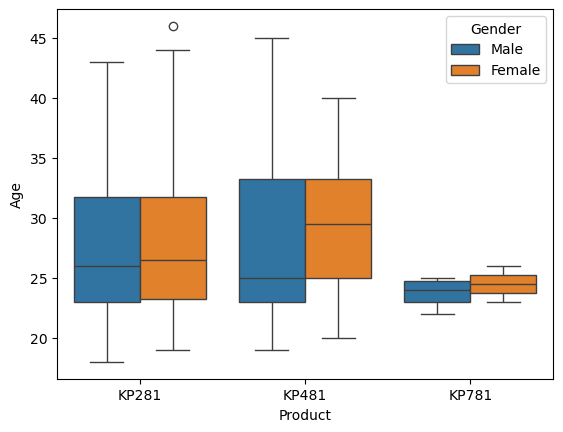

In [32]:

sns.boxplot(data = df , x = 'Product' , y = 'Age',hue = 'Gender')


<Axes: xlabel='Product', ylabel='Age'>

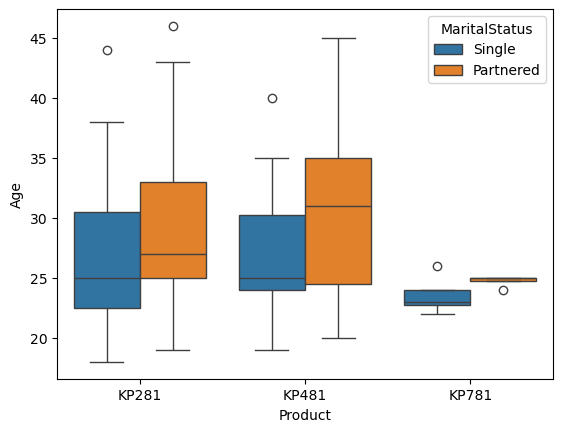

In [33]:
sns.boxplot(data = df , x = 'Product' , y = 'Age',hue = 'MaritalStatus')

From the above observation we can conclude that product KP781 is only bought by small segment of young people upto the age between 22 to 27.

Product KP481 and KP281 is prefferd by people with all types of ages ranging from below 20 years to above 35 years.

KP481 and KP281 are preffered by married individuals. 

# Segmenting the products for product wise analysis.

In [34]:

KP281 = df[df['Product']=='KP281']

KP481 = df[df['Product']=='KP481']

KP781 = df[df['Product']=='KP781']


# KP281 Analysis

In [35]:
KP281.describe()

Age  Education      Usage    Fitness        Income       Miles
count  76.000000  76.000000  76.000000  76.000000     76.000000   76.000000
mean   28.013158  14.986842   3.039474   2.907895  46003.618421   80.342105
std     6.579754   1.227392   0.756144   0.592793   8959.369131   24.899560
min    18.000000  12.000000   2.000000   1.000000  29562.000000   38.000000
25%    23.000000  14.000000   2.750000   3.000000  38658.000000   66.000000
50%    26.000000  15.000000   3.000000   3.000000  46048.500000   85.000000
75%    32.000000  16.000000   4.000000   3.000000  52586.250000   94.000000
max    46.000000  18.000000   5.000000   4.000000  68220.000000  141.000000

Text(0.5, 1.0, 'Distribution of age for product KP281')

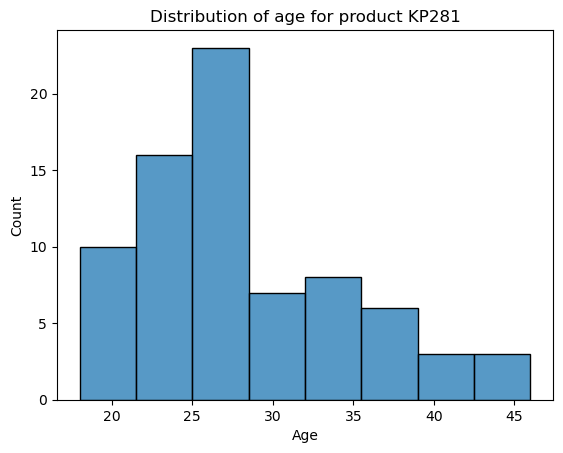

In [36]:
# Age Distribution for the Product KP281
sns.histplot(data = KP281 , x = 'Age')
plt.xlabel('Age')
plt.title('Distribution of age for product KP281')

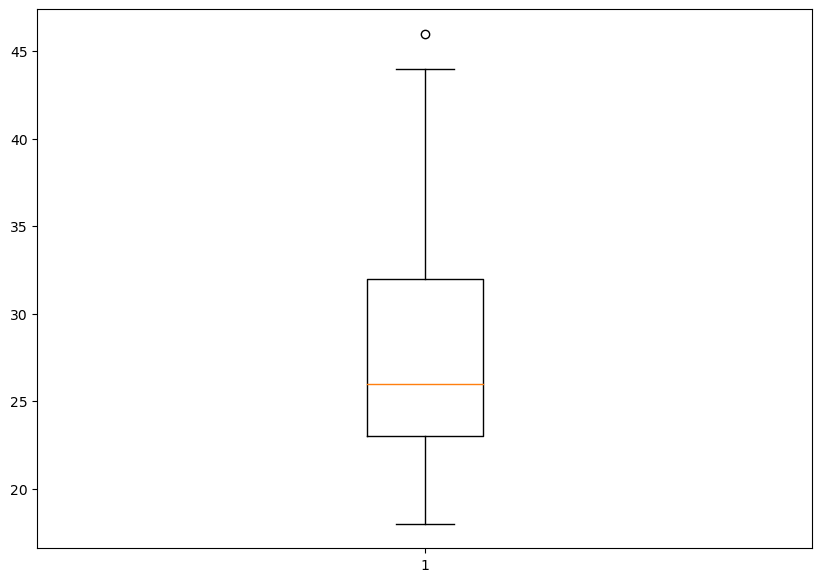

In [37]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(KP281['Age'])
plt.show()

Text(0.5, 1.0, 'Distribution based on Marital Status for product KP281')

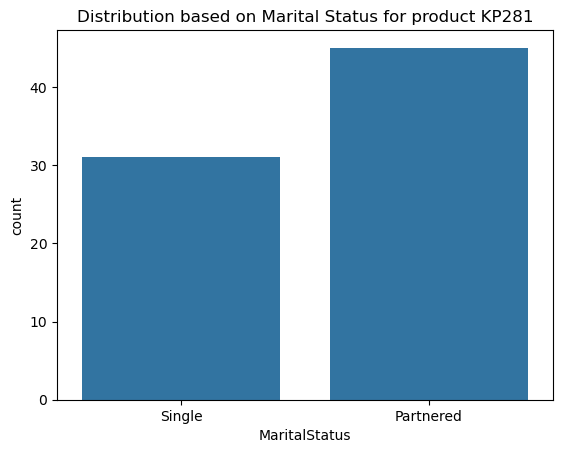

In [38]:
sns.countplot(x = 'MaritalStatus',data = KP281)
plt.title('Distribution based on Marital Status for product KP281')

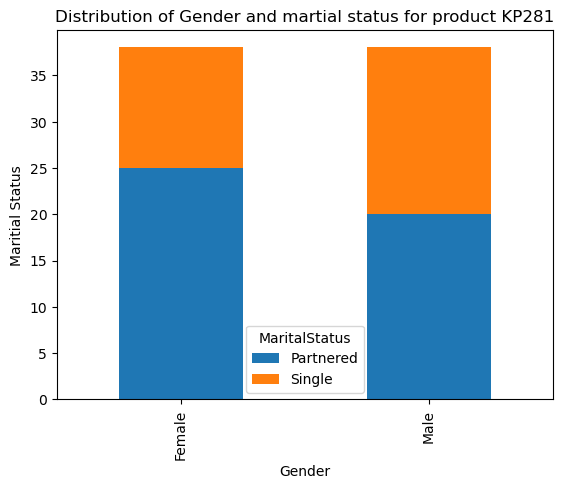

In [39]:
ctab = pd.crosstab(KP281.Gender,KP281.MaritalStatus,values = KP281.Product,aggfunc = 'count').round(0)
ctab.plot(kind = 'bar',stacked = True)
plt.xlabel('Gender')
plt.ylabel('Maritial Status')
plt.title('Distribution of Gender and martial status for product KP281')
plt.show()

Text(0.5, 1.0, 'Distribution of Fitness')

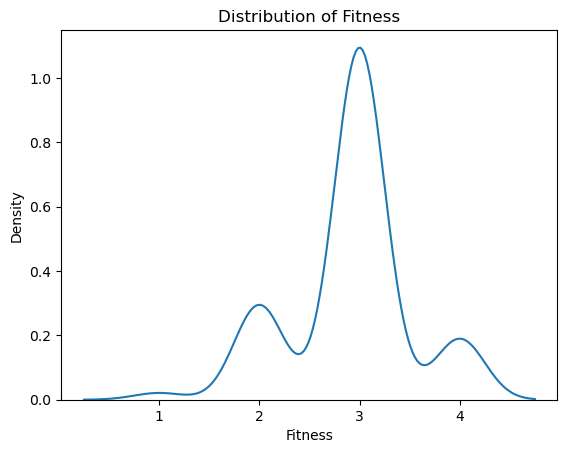

In [40]:
#nuniqe(KP281)
sns.kdeplot(data = KP281 , x = 'Fitness')
plt.title('Distribution of Fitness')


Text(0.5, 1.0, 'Distribution of Income')

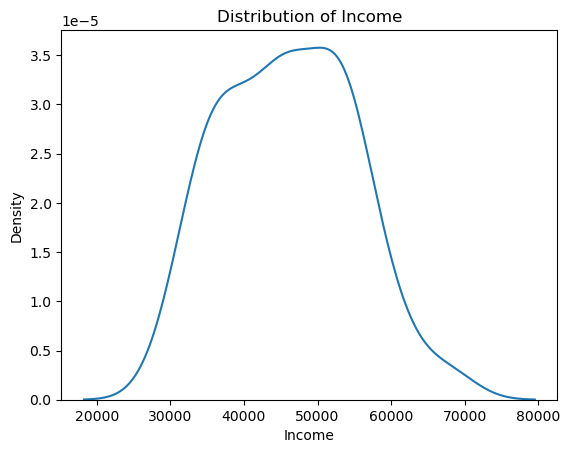

In [41]:
sns.kdeplot(data = KP281 , x = 'Income')
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Usage')

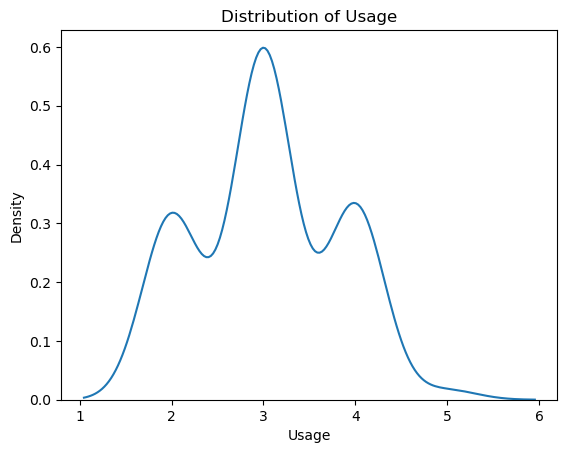

In [42]:
sns.kdeplot(data = KP281 , x = 'Usage')
plt.title('Distribution of Usage')

Text(0.5, 1.0, 'Comparision of Fitness and Usage')

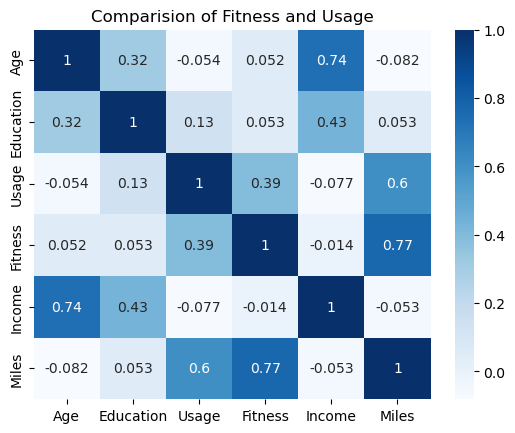

In [43]:
sns.heatmap(KP281.select_dtypes('number').corr(), cmap = 'Blues',annot=True)
plt.title('Comparision of Fitness and Usage')

# KP481 Analysis

In [44]:
KP481.describe()

Age  Education      Usage    Fitness        Income       Miles
count  56.000000  56.000000  56.000000  56.000000     56.000000   56.000000
mean   28.696429  15.178571   3.017857   2.857143  49060.767857   83.214286
std     6.243308   1.207660   0.750541   0.615809   8616.962008   25.080753
min    19.000000  12.000000   2.000000   1.000000  31836.000000   21.000000
25%    24.000000  14.000000   3.000000   3.000000  44911.500000   64.000000
50%    26.000000  16.000000   3.000000   3.000000  49459.500000   85.000000
75%    33.250000  16.000000   3.000000   3.000000  53439.000000   95.000000
max    45.000000  18.000000   5.000000   4.000000  67083.000000  127.000000

Text(0.5, 1.0, 'Distribution of age for product KP481')

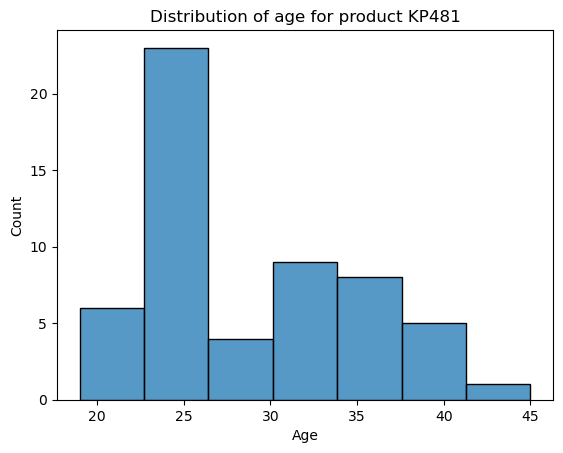

In [45]:
# Age Distribution for the Product KP481
sns.histplot(data = KP481 , x = 'Age')
plt.xlabel('Age')
plt.title('Distribution of age for product KP481')

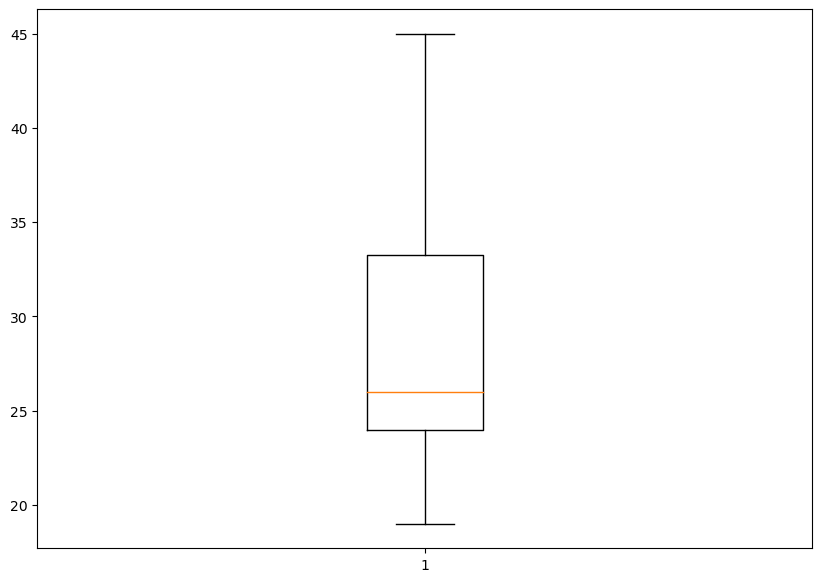

In [46]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(KP481['Age'])
plt.show()

Text(0.5, 1.0, 'Distribution based on Marital Status for product KP481')

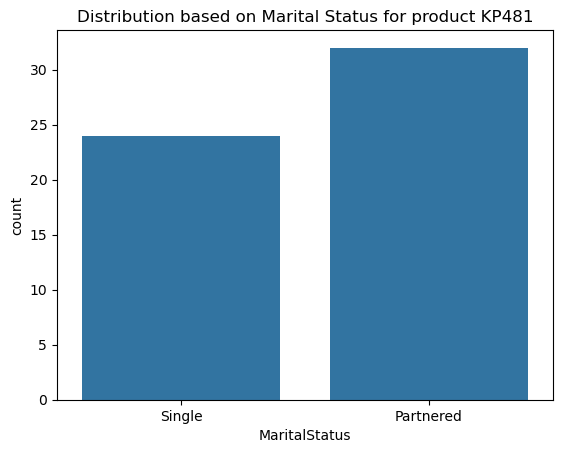

In [47]:
sns.countplot(x = 'MaritalStatus',data = KP481)
plt.title('Distribution based on Marital Status for product KP481')

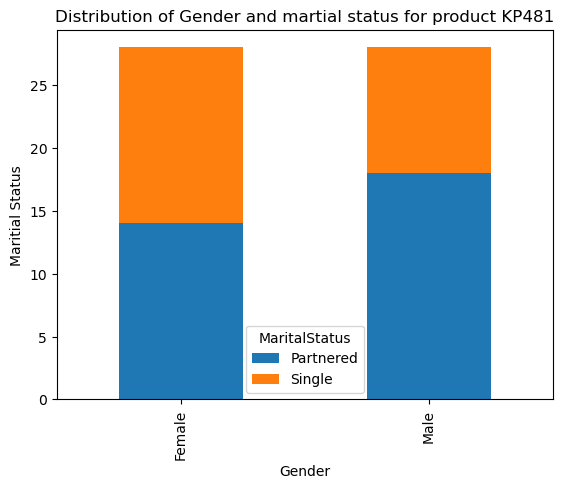

In [48]:
ctab = pd.crosstab(KP481.Gender,KP481.MaritalStatus,values = KP481.Product,aggfunc = 'count').round(0)
ctab.plot(kind = 'bar',stacked = True)
plt.xlabel('Gender')
plt.ylabel('Maritial Status')
plt.title('Distribution of Gender and martial status for product KP481')
plt.show()

Text(0.5, 1.0, 'Distribution of Fitness')

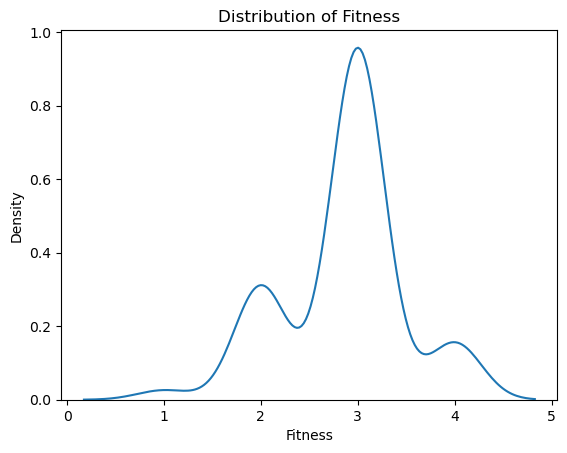

In [49]:
sns.kdeplot(data = KP481 , x = 'Fitness')
plt.title('Distribution of Fitness')

Text(0.5, 1.0, 'Distribution of Income')

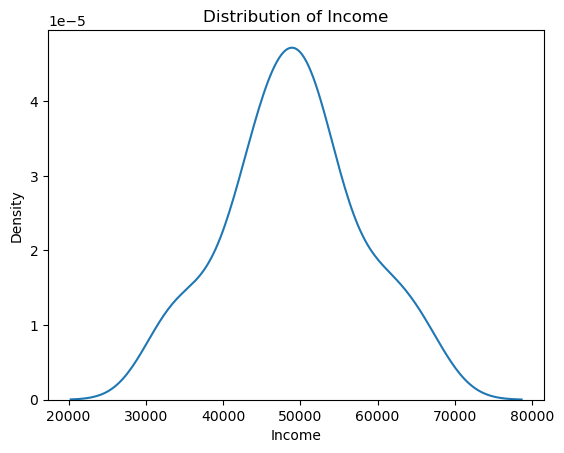

In [50]:
sns.kdeplot(data = KP481 , x = 'Income')
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Usage')

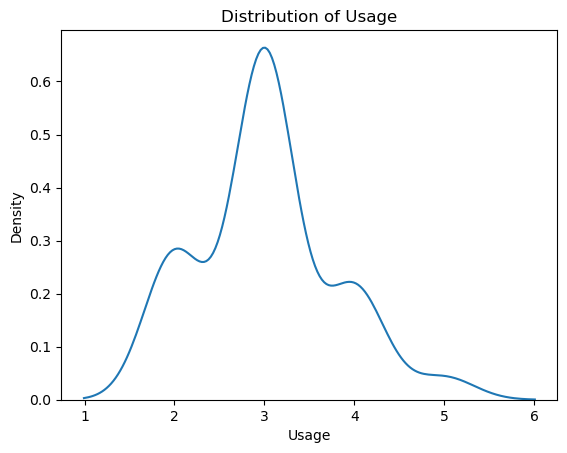

In [51]:
sns.kdeplot(data = KP481 , x = 'Usage')
plt.title('Distribution of Usage')

Text(0.5, 1.0, 'Comparision of Fitness and Usage')

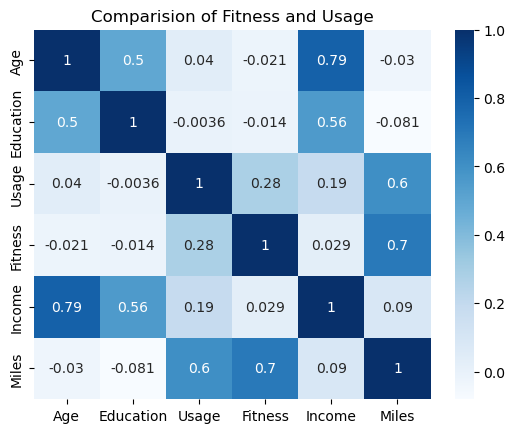

In [52]:
sns.heatmap(KP481.select_dtypes('number').corr(), cmap = 'Blues',annot=True)
plt.title('Comparision of Fitness and Usage')

# KP781 Analysis

Text(0.5, 1.0, 'Distribution of age for product KP781')

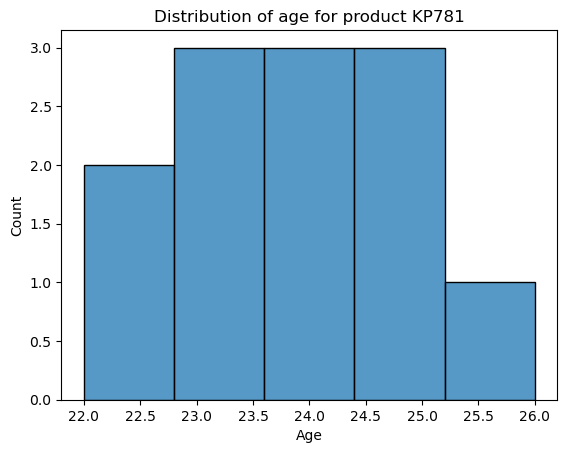

In [53]:
sns.histplot(data = KP781 , x = 'Age')
plt.xlabel('Age')
plt.title('Distribution of age for product KP781')

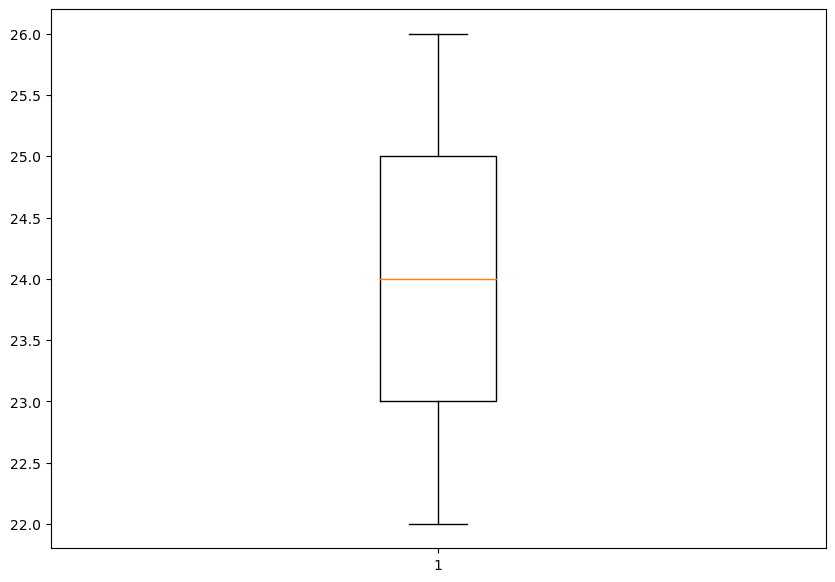

In [54]:
fig = plt.figure(figsize=(10,7))
plt.boxplot(KP781['Age'])
plt.show()

Text(0.5, 1.0, 'Distribution based on Marital Status for product KP781')

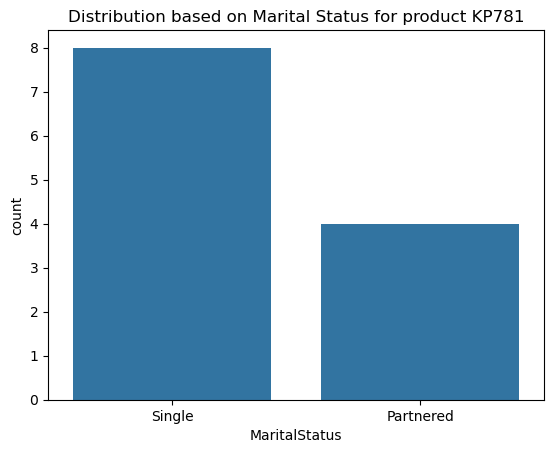

In [55]:
sns.countplot(x = 'MaritalStatus',data = KP781)
plt.title('Distribution based on Marital Status for product KP781')

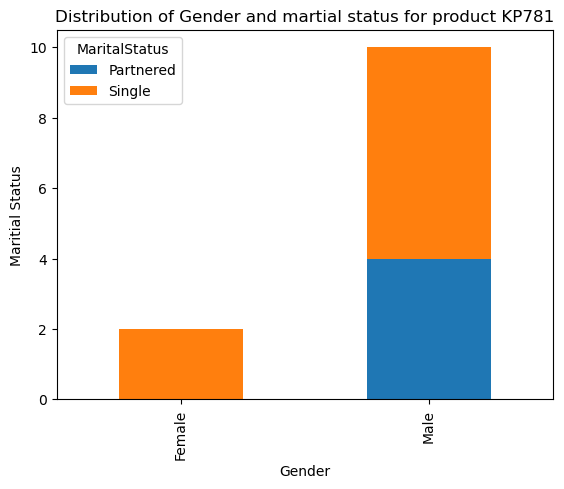

In [56]:
ctab = pd.crosstab(KP781.Gender,KP781.MaritalStatus,values = KP781.Product,aggfunc = 'count').round(0)
ctab.plot(kind = 'bar',stacked = True)
plt.xlabel('Gender')
plt.ylabel('Maritial Status')
plt.title('Distribution of Gender and martial status for product KP781')
plt.show()

Text(0.5, 1.0, 'Distribution of Fitness')

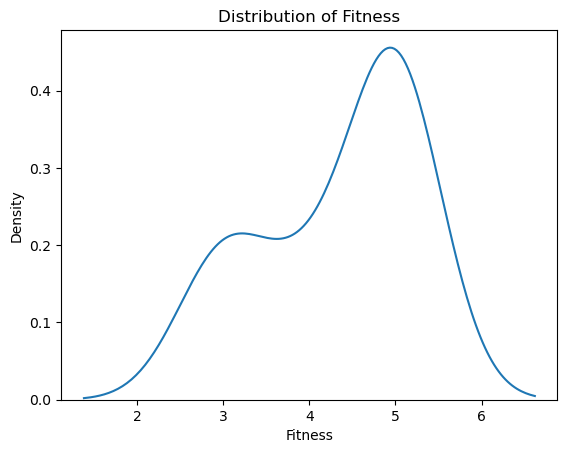

In [57]:
sns.kdeplot(data = KP781 , x = 'Fitness')
plt.title('Distribution of Fitness')

Text(0.5, 1.0, 'Distribution of Income')

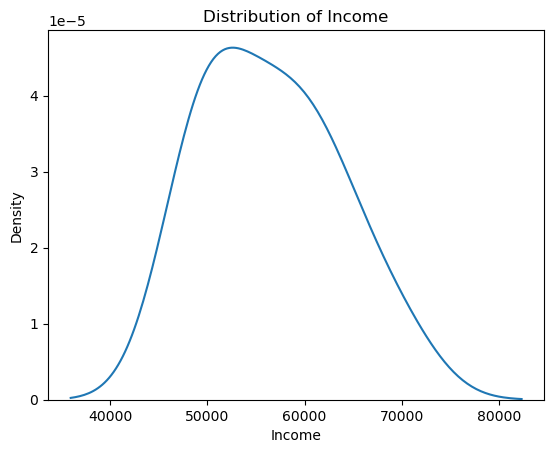

In [58]:
sns.kdeplot(data = KP781 , x = 'Income')
plt.title('Distribution of Income')

Text(0.5, 1.0, 'Distribution of Usage')

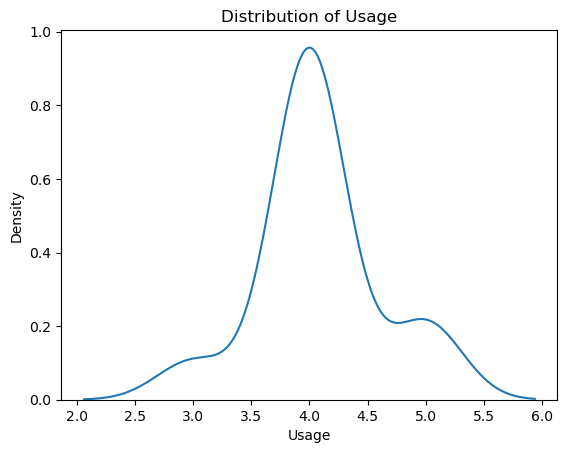

In [59]:
sns.kdeplot(data = KP781 , x = 'Usage')
plt.title('Distribution of Usage')

Text(0.5, 1.0, 'Comparision of Fitness and Usage')

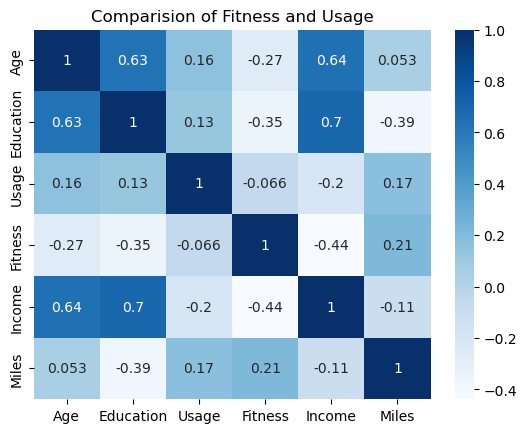

In [60]:
sns.heatmap(KP781.select_dtypes('number').corr(), cmap = 'Blues',annot=True)
plt.title('Comparision of Fitness and Usage')

# Conditional and marginal probabilities

In [61]:
pd.crosstab(df.Product,df.Gender,values = df.Miles,aggfunc = ['min','max','mean']).round(0)

min         max        mean       
Gender  Female Male Female Male Female   Male
Product                                      
KP281       38   47    113  141   74.0   87.0
KP481       21   42    127  127   83.0   84.0
KP781      100   80    100  160  100.0  119.0

In [62]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.527778
KP481    0.388889
KP781    0.083333
Name: proportion, dtype: float64

In [63]:
#Whats the probability of a new customer to be a Male.
Total_samples = len(df)
Male_Customers = len(df[df['Gender']=='Male'])

Probablity_Male_Customers = Male_Customers/Total_samples
print('Probability of a customer to be Male is : ',round(Probablity_Male_Customers,4)*100,'%')

Probability of a customer to be Male is :  52.78 %


In [64]:
#Whats the probability of a new customer to be a Female.
Total_samples = len(df)
Female_Customers = len(df[df['Gender']=='Female'])

Probablity_Female_Customers = Female_Customers/Total_samples
print('Probability of a  customer to be Female is : ',round(Probablity_Female_Customers,4)*100,'%')

Probability of a  customer to be Female is :  47.22 %


In [65]:
# Probability of a new customer to be Male is :  54.43 % what is the probability if a customer is Male then he is Married
Total_Male_Customers = len(df[df['Gender']=='Male'])
Married_Male_Customers = len(df[(df['Gender']=='Male') & (df['MaritalStatus']=='Partnered')])

Probablity_Married_Male_Customers = Married_Male_Customers/Total_Male_Customers
print('Probability of a  customer to be Male and married is : ',round(Probablity_Married_Male_Customers,4)*100,'%')

print('Probability of a  customer to be Male and Unmarried is : ',round(1-Probablity_Married_Male_Customers,4)*100,'%')

Probability of a  customer to be Male and married is :  55.26 %
Probability of a  customer to be Male and Unmarried is :  44.74 %


In [66]:
# Probability of a new customer to be Female is :  45.57 % what is the probability if a customer is Male then he is Married
Total_Female_Customers = len(df[df['Gender']=='Female'])
Married_Female_Customers = len(df[(df['Gender']=='Female') & (df['MaritalStatus']=='Partnered')])

Probablity_Married_Female_Customers = round(Married_Female_Customers/Total_Female_Customers,4)
print('Probability of a  customer to be Female and married is : ',round(Probablity_Married_Female_Customers*100,2),'%')

print('Probability of a  customer to be Female and Unmarried is : ',round(100-Probablity_Married_Female_Customers*100,2),'%')


Probability of a  customer to be Female and married is :  57.35 %
Probability of a  customer to be Female and Unmarried is :  42.65 %


 Hence we can say from the above calculations that the probability of a male customer is more then female
 and for both male and female customers over all probability of being Married is more then single.
 We can conclude that Married people are bying this product more then their unmarried counterparts.

In [67]:
df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])

print("P(Male) : ",round(df1.loc['Male'].sum()/len(df),2))
print("P(Female) : ",round(df1.loc['Female'].sum()/len(df),2))
print('')


KP281 = df1['KP281']['Male']/df1.loc['Male'].sum()
KP481 = df1['KP481']['Male']/df1.loc['Male'].sum()
KP781 = df1['KP781']['Male']/df1.loc['Male'].sum()

print('KP281 - Male Customers : ',round(KP281,2))
print('KP481 - Male Customers : ',round(KP481,2))
print('KP781 - Male Customers : ',round(KP781,2))
print('')

KP281 = df1['KP281']['Female']/df1.loc['Female'].sum()
KP481 = df1['KP481']['Female']/df1.loc['Female'].sum()
KP781 = df1['KP781']['Female']/df1.loc['Female'].sum()

print('KP281 - Female Customers : ',round(KP281,2))
print('KP481 - Female Customers : ',round(KP481,2))
print('KP781 - Female Customers : ',round(KP781,2))

P(Male) :  0.53
P(Female) :  0.47

KP281 - Male Customers :  0.5
KP481 - Male Customers :  0.37
KP781 - Male Customers :  0.13

KP281 - Female Customers :  0.56
KP481 - Female Customers :  0.41
KP781 - Female Customers :  0.03
